In [135]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
App_Data=pd.read_csv("application_data.csv")
Prev_Data=pd.read_csv("previous_application.csv")

#Trim column name for any spaces
App_Data.columns.str.strip()
Prev_Data.columns.str.strip()


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [209]:
#DATA CLEANING STARTS!

In [136]:
#Drop Irrelevant columns

col1=["NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","NONLIVINGAPARTMENTS_AVG",
"NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE",
"COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE",
"LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","APARTMENTS_MEDI",
"BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI",
"LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE",
"WALLSMATERIAL_MODE","LIVINGAPARTMENTS_AVG","OWN_CAR_AGE","LIVINGAREA_AVG",
      "TOTALAREA_MODE","EMERGENCYSTATE_MODE"]

col2=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","NAME_TYPE_SUITE","SELLERPLACE_AREA","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","PRODUCT_COMBINATION","RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY"]

App_Data=App_Data.drop(col1,axis=1)
Prev_Data=Prev_Data.drop(col2,axis=1)


In [137]:
#Rename columns - wherever necessary
App_Data=App_Data.rename(columns={
'NAME_CONTRACT_TYPE' :'Loan_Type',
'CODE_GENDER': 'Gender',
'FLAG_OWN_CAR': 'Car',
'FLAG_OWN_REALTY':        'Realty',
'NAME_INCOME_TYPE':        'Income_Type',
'NAME_EDUCATION_TYPE':    'Education',
'NAME_FAMILY_STATUS':        'Family_Status',
'NAME_HOUSING_TYPE':        'House_Status',
'FLAG_MOBIL':           'Mobile',
'FLAG_EMP_PHONE':        'Emp_Phn',
'FLAG_WORK_PHONE':        'Work_Phn',
'FLAG_CONT_MOBILE':        'Mobile_Reachable',
'FLAG_PHONE':            'Landline',
'FLAG_EMAIL':            'Email',
'FLAG_DOCUMENT_2':        'Document2',
'FLAG_DOCUMENT_3':        'Document3',
'FLAG_DOCUMENT_4':        'Document4',
'FLAG_DOCUMENT_5':        'Document5',
'FLAG_DOCUMENT_6':        'Document6',
'FLAG_DOCUMENT_7':        'Document7',
'FLAG_DOCUMENT_8':        'Document8',
'FLAG_DOCUMENT_9':        'Document9',
'FLAG_DOCUMENT_10':        'Document10',
'FLAG_DOCUMENT_11':        'Document11',
'FLAG_DOCUMENT_12':        'Document12',
'FLAG_DOCUMENT_13':        'Document13',
'FLAG_DOCUMENT_14':        'Document14',
'FLAG_DOCUMENT_15':        'Document15',
'FLAG_DOCUMENT_16':        'Document16',
'FLAG_DOCUMENT_17':        'Document17',
'FLAG_DOCUMENT_18':        'Document18',
'FLAG_DOCUMENT_19':        'Document19',
'FLAG_DOCUMENT_20':        'Document20',
'FLAG_DOCUMENT_21':        'Document21',
'AMT_REQ_CREDIT_BUREAU_HOUR':        'CrB_Enq_Hr',
'AMT_REQ_CREDIT_BUREAU_DAY':        'CrB_Enq_Day',
'AMT_REQ_CREDIT_BUREAU_WEEK':        'CrB_Enq_Wk',
'AMT_REQ_CREDIT_BUREAU_MON':        'CrB_Enq_Mon',
'AMT_REQ_CREDIT_BUREAU_QRT':        'CrB_Enq_Qrt',
'AMT_REQ_CREDIT_BUREAU_YEAR':        'CrB_Enq_Yr'})
App_Data


,SK_ID_CURR,TARGET,Loan_Type,Gender,Car,Realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Document18,Document19,Document20,Document21,CrB_Enq_Hr,CrB_Enq_Day,CrB_Enq_Wk,CrB_Enq_Mon,CrB_Enq_Qrt,CrB_Enq_Yr
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
#Rename Columns wherever necessary
Prev_App=Prev_Data.rename(columns={
'NAME_CONTRACT_TYPE':        'Loan_Type',
'NAME_CASH_LOAN_PURPOSE':        'Cash_Loan_Purpose',
'NAME_CONTRACT_STATUS':        'Loan_Status',
'NAME_PAYMENT_TYPE':            'Payment_Method',
'CODE_REJECT_REASON':            'Reject_Reason',
'NAME_CLIENT_TYPE':            'Client_Type',
'NAME_GOODS_CATEGORY':        'Goods_Category',
'NAME_PORTFOLIO':           'Portfolio',
'NAME_PRODUCT_TYPE':            'Product_type',
'NAME_SELLER_INDUSTRY':        'Seller_Industry',
'CNT_PAYMENT':                'Payment_Term',
'NAME_YIELD_GROUP':            'Yield_group',
'NFLAG_INSURED_ON_APPROVAL':    'Insured_On_Approval'})
Prev_App

,SK_ID_PREV,SK_ID_CURR,Loan_Type,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,Cash_Loan_Purpose,...,CHANNEL_TYPE,Seller_Industry,Payment_Term,Yield_group,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,Insured_On_Approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,XAP,...,Country-wide,Connectivity,12.0,middle,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,NaN,XNA,...,Contact center,XNA,36.0,low_action,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,NaN,XNA,...,Credit and cash offices,XNA,12.0,high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,NaN,XNA,...,Credit and cash offices,XNA,12.0,middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,NaN,Repairs,...,Credit and cash offices,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,NaN,Everyday expenses,...,Credit and cash offices,XNA,18.0,low_normal,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,NaN,XNA,...,Credit and cash offices,XNA,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,NaN,XNA,...,Credit and cash offices,XNA,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,NaN,XNA,...,Credit and cash offices,XNA,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,NaN,XNA,...,Credit and cash offices,XNA,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
#Check for percentange of missing data for each column in Application Data
percent_missing_app = (App_Data.isnull().sum() * 100 / len(App_Data)).sort_values(ascending=False)
percent_missing_app

EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
CrB_Enq_Yr                     13.501631
CrB_Enq_Mon                    13.501631
CrB_Enq_Wk                     13.501631
CrB_Enq_Day                    13.501631
CrB_Enq_Hr                     13.501631
CrB_Enq_Qrt                    13.501631
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
Document13                      0.000000
Family_Status                   0.000000
Work_Phn                        0.000000
Emp_Phn                         0.000000
Mobile                          0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATIO

In [140]:
# Impute the missing values in App_Data dataframe wherever  relevant

App_Data["EXT_SOURCE_1"].fillna('0',inplace=True)
App_Data["EXT_SOURCE_2"].fillna('0',inplace=True)
App_Data["EXT_SOURCE_3"].fillna('0',inplace=True)
App_Data["OCCUPATION_TYPE"].fillna('others',inplace=True)
App_Data["CrB_Enq_Qrt"].fillna('0',inplace=True)
App_Data["CrB_Enq_Yr"].fillna('0',inplace=True)
App_Data["CrB_Enq_Mon"].fillna('0',inplace=True)
App_Data["CrB_Enq_Wk"].fillna('0',inplace=True)
App_Data["CrB_Enq_Hr"].fillna('0',inplace=True)
App_Data["CrB_Enq_Day"].fillna('0',inplace=True)
App_Data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna('0',inplace=True)
App_Data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna('0',inplace=True)
App_Data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna('0',inplace=True)
App_Data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna('0',inplace=True)
App_Data["AMT_GOODS_PRICE"].fillna('0',inplace=True)
App_Data["AMT_ANNUITY"].fillna('0',inplace=True)
App_Data["CNT_FAM_MEMBERS"].fillna('0',inplace=True)
App_Data["DAYS_LAST_PHONE_CHANGE"].fillna('0',inplace=True)

In [141]:
#Check for percentange of missing data for each column in Pervious Application Data
percent_missing_prev = (Prev_App.isnull().sum() * 100 / len(Prev_App)).sort_values(ascending=False)
percent_missing_prev

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
Insured_On_Approval          40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
Payment_Term                 22.286366
AMT_CREDIT                    0.000060
Loan_Type                     0.000000
AMT_APPLICATION               0.000000
Loan_Status                   0.000000
SK_ID_CURR                    0.000000
Cash_Loan_Purpose             0.000000
Reject_Reason                 0.000000
DAYS_DECISION                 0.000000
Payment_Method                0.000000
Client_Type                   0.000000
Goods_Category                0.000000
Portfolio                     0.000000
Product_type                  0.000000
CHANNEL_TYPE                  0.000000
Seller_Industry          

In [142]:
#More than 50% values are missing in columns AMT_DOWN_PAYMENT & RATE_DOWN_PAYMENT
#drop these columns as these are not much important for Analysis

Prev_App=Prev_App.drop('AMT_DOWN_PAYMENT',axis=1)
Prev_App=Prev_App.drop('RATE_DOWN_PAYMENT',axis=1)

In [143]:
# Impute the missing values in Prev_Data dataframe
Prev_App["DAYS_TERMINATION"].fillna('0',inplace=True)
Prev_App["Insured_On_Approval"].fillna('0',inplace=True)
Prev_App["DAYS_FIRST_DRAWING"].fillna('0',inplace=True)
Prev_App["DAYS_FIRST_DUE"].fillna('0',inplace=True)
Prev_App["DAYS_LAST_DUE_1ST_VERSION"].fillna('0',inplace=True)
Prev_App["DAYS_LAST_DUE"].fillna('0',inplace=True)
Prev_App["AMT_GOODS_PRICE"].fillna('0',inplace=True)
Prev_App["AMT_ANNUITY"].fillna(')',inplace=True)
Prev_App["Payment_Term"].fillna('0',inplace=True)
Prev_App["AMT_CREDIT"].fillna('0',inplace=True)

#CLean irrelevant data
Prev_App.drop(Prev_App.loc[Prev_App['AMT_ANNUITY']==')'].index, inplace=True)
#Convert to suitable type
Prev_App['AMT_ANNUITY']= Prev_App['AMT_ANNUITY'].astype(float)

In [144]:
#Check XAP(Not applicable) and XNA(Not Available) values in Application Data
xna_xap = App_Data.isin(['XAP','XNA']).any()
cols = xna_xap.index[xna_xap].tolist()
cols

['Gender', 'ORGANIZATION_TYPE']

In [145]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Gender
percent_xna = (App_Data['Gender'].value_counts()/App_Data['Gender'].count())*100
percent_xna

F      65.834393
M      34.164306
XNA     0.001301
Name: Gender, dtype: float64

In [ ]:
#Since a very small percentage is missing , not imputing the values

In [146]:
#Check % XAP(Not applicable) and XNA(Not Available) values in ORGANIZATION_TYPE
percent_xna = (App_Data['ORGANIZATION_TYPE'].value_counts()/App_Data['ORGANIZATION_TYPE'].count())*100
percent_xna

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [ ]:
#Since a small percentage is missing , not imputing the values

In [147]:
#Check XAP(Not applicable) and XNA(Not Available) values in Previous Application Data
xna_xap = Prev_App.isin(['XAP','XNA']).any()
cols = xna_xap.index[xna_xap].tolist()
cols

['Cash_Loan_Purpose',
 'Payment_Method',
 'Reject_Reason',
 'Client_Type',
 'Goods_Category',
 'Product_type',
 'Seller_Industry',
 'Yield_group']

In [148]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Loan_Type
percent_xna = (Prev_App['Loan_Type'].value_counts()/Prev_App['Loan_Type'].count())*100
percent_xna

Consumer loans     53.269891
Cash loans         35.560128
Revolving loans    11.169980
Name: Loan_Type, dtype: float64

In [149]:
#Very few values missing, replacing it with cash loans
App_Data.loc[App_Data['Loan_Type'] == 'XNA' , 'Loan_Type']="Cash loans"

In [150]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Cash_Loan_Purpose
percent_xna = (Prev_App['Cash_Loan_Purpose'].value_counts()/Prev_App['Cash_Loan_Purpose'].count())*100
percent_xna

XAP                                 64.439872
XNA                                 30.215512
Repairs                              1.825761
Other                                1.194087
Urgent needs                         0.647545
Buying a used car                    0.221267
Building a house or an annex         0.207476
Everyday expenses                    0.184441
Medicine                             0.166952
Payments on other loans              0.148385
Education                            0.120726
Journey                              0.095148
Purchase of electronic equipment     0.081280
Buying a new car                     0.077505
Wedding / gift / holiday             0.073730
Buying a home                        0.066642
Car repairs                          0.061403
Furniture                            0.057628
Buying a holiday home / land         0.041064
Business development                 0.032743
Gasification / water supply          0.023036
Buying a garage                   

In [151]:
#Since 95% are either not available or not applicable, dropping the column
Prev_App=Prev_App.drop('Cash_Loan_Purpose',axis=1)

In [152]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Payment_Method
percent_xna = (Prev_App['Payment_Method'].value_counts()/Prev_App['Payment_Method'].count())*100
percent_xna

Cash through the bank                        76.806713
XNA                                          22.484878
Non-cash from your account                    0.625973
Cashless from the account of the employer     0.082436
Name: Payment_Method, dtype: float64

In [153]:
#This column does not seem to make an impact on analysis, hence dropping
Prev_App=Prev_App.drop('Payment_Method',axis=1)

In [154]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Goods_Category
percent_xna = (Prev_App['Goods_Category'].value_counts()/Prev_App['Goods_Category'].count())*100
percent_xna

XNA                         47.375112
Mobile                      15.434302
Consumer Electronics         9.243678
Computers                    7.703360
Audio/Video                  7.532865
Furniture                    4.105382
Construction Materials       1.915747
Clothing and Accessories     1.803419
Photo / Cinema Equipment     1.783773
Auto Accessories             0.551087
Jewelry                      0.482288
Homewares                    0.385060
Medical Supplies             0.295922
Vehicles                     0.256938
Sport and Leisure            0.227199
Gardening                    0.204395
Other                        0.196767
Office Appliances            0.176813
Tourism                      0.127198
Medicine                     0.119416
Direct Sales                 0.034284
Fitness                      0.016102
Additional Service           0.009861
Education                    0.008244
Weapon                       0.005855
Insurance                    0.004777
House Constr

In [155]:
#Since more than 50% is XNA, dropping the column
Prev_App=Prev_App.drop('Goods_Category',axis=1)

In [156]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Reject_Reason
percent_xna = (Prev_App['Reject_Reason'].value_counts()/Prev_App['Reject_Reason'].count())*100
percent_xna

XAP       80.685435
HC        11.301107
LIMIT      3.932344
SCO        2.762448
SCOFR      0.667422
VERIF      0.270112
XNA        0.260405
CLIENT     0.070263
SYSTEM     0.050463
Name: Reject_Reason, dtype: float64

In [157]:
#Since 81% is XAP, dropping the column
Prev_App=Prev_App.drop('Reject_Reason',axis=1)

In [158]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Reject_Reason
percent_xna = (Prev_App['Client_Type'].value_counts()/Prev_App['Client_Type'].count())*100
percent_xna

Repeater     68.659971
New          22.702293
Refreshed     8.568320
XNA           0.069416
Name: Client_Type, dtype: float64

In [159]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Portfolio
percent_xna = (Prev_App['Portfolio'].value_counts()/Prev_App['Portfolio'].count())*100
percent_xna

POS      53.237148
Cash     35.560128
Cards    11.169980
Cars      0.032743
Name: Portfolio, dtype: float64

In [160]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Product_type
percent_xna = (Prev_App['Product_type'].value_counts()/Prev_App['Product_type'].count())*100
percent_xna

XNA        53.269891
x-sell     35.153573
walk-in    11.576536
Name: Product_type, dtype: float64

In [161]:
#Since 63% are XNA, dropping the column
Prev_App=Prev_App.drop('Product_type',axis=1)

In [162]:
#Check % XAP(Not applicable) and XNA(Not Available) values in Seller_Industry
percent_xna = (Prev_App['Seller_Industry'].value_counts()/Prev_App['Seller_Industry'].count())*100
percent_xna

XNA                     40.277154
Consumer electronics    30.233540
Connectivity            18.777191
Furniture                4.416558
Construction             2.283396
Clothing                 1.834775
Industry                 1.469053
Auto technology          0.383288
Jewelry                  0.208632
MLM partners             0.076889
Tourism                  0.039523
Name: Seller_Industry, dtype: float64

In [163]:
#50% data is missing and every industry has different loan analysis , so dropping the column
Prev_App=Prev_App.drop('Seller_Industry',axis=1)

In [164]:
#Check % XAP(Not applicable) and XNA(Not Available) values in #Check % XAP(Not applicable) and XNA(Not Available) values in Seller_Industry
percent_xna = (Prev_App['Yield_group'].value_counts()/Prev_App['Yield_group'].count())*100
percent_xna

middle        29.702407
high          27.221396
low_normal    24.815116
XNA           11.169980
low_action     7.091101
Name: Yield_group, dtype: float64

In [165]:
#We will treat the missing values as "Middle". 
Prev_App.loc[Prev_App['Yield_group'] == 'XNA' , 'Yield_group']='middle'

In [166]:
App_Data

,SK_ID_CURR,TARGET,Loan_Type,Gender,Car,Realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Document18,Document19,Document20,Document21,CrB_Enq_Hr,CrB_Enq_Day,CrB_Enq_Wk,CrB_Enq_Mon,CrB_Enq_Qrt,CrB_Enq_Yr
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0,0,0,0,1,1
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301,...,0,0,0,0,0,0,0,1,1,2
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0,0,0,0,0,1
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#New Calculated fields
App_Data['AMT_ANNUITY']= App_Data['AMT_ANNUITY'].astype(float) #This is object type
App_Data['EXT_SOURCE_1']= App_Data['EXT_SOURCE_1'].astype(float) #This is object type
App_Data['EXT_SOURCE_2']= App_Data['EXT_SOURCE_2'].astype(float) #This is object type
App_Data['EXT_SOURCE_3']= App_Data['EXT_SOURCE_3'].astype(float) #This is object type
App_Data['Income_perc'] = ((App_Data['AMT_INCOME_TOTAL'] - App_Data['AMT_ANNUITY'])/App_Data['AMT_INCOME_TOTAL'])*100
App_Data['Age'] = App_Data['DAYS_BIRTH'] /(-365)
App_Data['Count_Contact'] = App_Data['Mobile']+App_Data['Emp_Phn']+App_Data['Work_Phn']+App_Data['Landline']+App_Data['Email']
App_Data['Score_Ext'] = App_Data['EXT_SOURCE_1']+App_Data['EXT_SOURCE_2']+App_Data['EXT_SOURCE_3']
App_Data['DEF_SOCIAL_CIRCLE'] = App_Data['DEF_30_CNT_SOCIAL_CIRCLE']+App_Data['OBS_30_CNT_SOCIAL_CIRCLE']+App_Data['DEF_60_CNT_SOCIAL_CIRCLE']+App_Data['OBS_60_CNT_SOCIAL_CIRCLE']
App_Data['Total_Docs'] = App_Data['Document2']+App_Data['Document3']+App_Data['Document4']+App_Data['Document5']+App_Data['Document6']+App_Data['Document7']+App_Data['Document8']+App_Data['Document9']+App_Data['Document10']+App_Data['Document11']+App_Data['Document12']+App_Data['Document13']+App_Data['Document14']+App_Data['Document15']+App_Data['Document16']+App_Data['Document17']+App_Data['Document18']+App_Data['Document19']+App_Data['Document20']+App_Data['Document21']
App_Data['Total_Cr_Enq'] = App_Data['CrB_Enq_Hr']+App_Data['CrB_Enq_Day']+App_Data['CrB_Enq_Wk']+App_Data['CrB_Enq_Mon']+App_Data['CrB_Enq_Qrt']+App_Data['CrB_Enq_Yr']


In [169]:
# After calculating new columns in App_Data dataframe, we will remove those old columns which won't be used 
#further for Analysis
cols_to_drop=["AMT_ANNUITY","DAYS_BIRTH","DAYS_EMPLOYED","Mobile",
    "Emp_Phn","Work_Phn","Landline","Email","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
    "DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE","Document2","Document3","Document4","Document5","Document6",
    "Document7","Document8","Document9","Document10","Document11","Document12","Document13",
    "Document14","Document15","Document16","Document17","Document18","Document19",
    "Document20","Document21","CrB_Enq_Hr","CrB_Enq_Day","CrB_Enq_Wk","CrB_Enq_Mon",
    "CrB_Enq_Qrt","CrB_Enq_Yr"]

App_Data=App_Data.drop(cols_to_drop,axis=1)

In [170]:
App_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'Loan_Type', 'Gender', 'Car', 'Realty',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'Income_Type', 'Education', 'Family_Status', 'House_Status',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'Mobile_Reachable',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'Income_perc', 'Age',
       'Count_Contact', 'Score_Ext', 'DEF_SOCIAL_CIRCLE', 'Total_Docs',
       'Total_Cr_Enq'],
      dtype='object')

In [171]:
Prev_App.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'Loan_Type', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'Loan_Status',
       'DAYS_DECISION', 'Client_Type', 'Portfolio', 'CHANNEL_TYPE',
       'Payment_Term', 'Yield_group', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'Insured_On_Approval'],
      dtype='object')

In [38]:
# we will remove the columns AMT_GOODS_PRICE , DAYS_REGISTRATION & DAYS_ID_PUBLISH from the
# dataframe App_Data beacuse they are not important for analysis.
App_Data=App_Data.drop('AMT_GOODS_PRICE',axis=1)
App_Data=App_Data.drop('DAYS_REGISTRATION',axis=1)
App_Data=App_Data.drop('DAYS_ID_PUBLISH',axis=1)

In [ ]:
#Data Cleaning Ends!

In [ ]:
#DATA ANALYSIS

In [172]:
# Split the App_Data in two dataframes based on Target values
# default_cust with Target value = 1

default_cust=App_Data.loc[App_Data['TARGET']==1]
default_cust

,SK_ID_CURR,TARGET,Loan_Type,Gender,Car,Realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_perc,Age,Count_Contact,Score_Ext,DEF_SOCIAL_CIRCLE,Total_Docs,Total_Cr_Enq
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000,...,0,Business Entity Type 3,-1134,87.802222,25.920548,3,0.485361,8,1,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000,...,0,Business Entity Type 3,-161,75.932000,51.298630,2,0.739183,21,2,4
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000,...,0,Business Entity Type 3,-1075,82.702222,47.895890,2,0.627004,0,1,6
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500,...,0,Self-employed,-1480,87.956667,36.668493,4,1.542087,2,1,2
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000,...,0,XNA,0,81.983333,67.928767,1,0.744897,4,1,0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,900000,...,1,Industry: type 4,-591,79.648571,27.942466,2,0.509839,0,1,2
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,585000,...,1,Trade: type 2,-56,80.442857,28.838356,3,0.402711,0,1,0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,675000,...,0,Business Entity Type 3,-106,87.436923,45.663014,4,1.241894,0,1,0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,166500,...,0,Business Entity Type 3,-216,91.957143,48.049315,3,0.625787,0,1,6
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,225000,...,1,Trade: type 3,-122,81.202252,21.887671,3,0.599947,0,0,0


In [173]:
# other_cust with Target value = 0

other_cust=App_Data.loc[App_Data['TARGET']==0]
other_cust

,SK_ID_CURR,TARGET,Loan_Type,Gender,Car,Realty,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_perc,Age,Count_Contact,Score_Ext,DEF_SOCIAL_CIRCLE,Total_Docs,Total_Cr_Enq
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,1.1295e+06,...,0,School,-828,86.778333,45.931507,3,0.933513,2,1,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,135000,...,0,Government,-815,90.000000,52.180822,4,1.285479,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,297000,...,0,Business Entity Type 3,-617,78.010000,52.068493,2,0.650442,4,1,000000
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,513000,...,1,Religion,-1106,82.003704,54.608219,2,0.322738,0,1,0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,454500,...,0,Other,-2536,72.204545,46.413699,4,0.975451,0,1,2
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,1.395e+06,...,0,Business Entity Type 3,-1562,75.847368,37.747945,3,1.990821,2,2,4
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,1.53e+06,...,1,Other,-1070,88.312500,51.643836,3,1.254934,4,1,0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500,...,0,XNA,0,69.932000,55.065753,1,1.544805,2,1,1
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,405000,...,0,Electricity,-1673,85.000000,39.641096,2,0.746644,4,0,000000
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,652500,...,0,Medicine,-844,81.176000,27.936986,2,1.335568,0,1,1


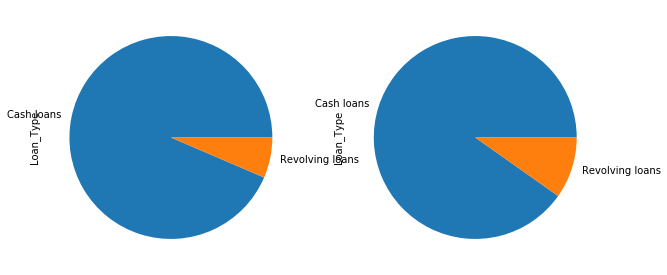

In [174]:
#Comparing Loan_Type of both
plt.subplot(121)
default_cust["Loan_Type"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Loan_Type"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Shows the defaulters take more cash loans as compared to others

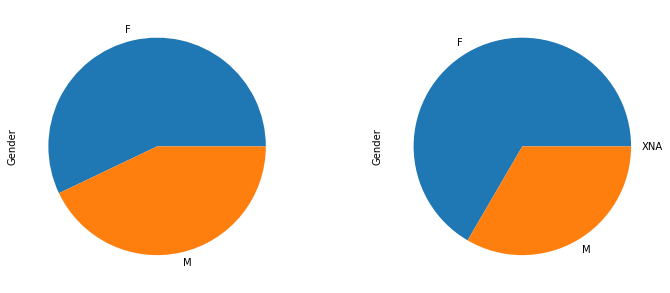

In [175]:
#Comparing Gnder from both data
plt.subplot(121)
default_cust["Gender"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Gender"].value_counts().plot.pie(figsize=(12,5))

In [ ]:
#Shows the defaulters have more proportion of males compared to others

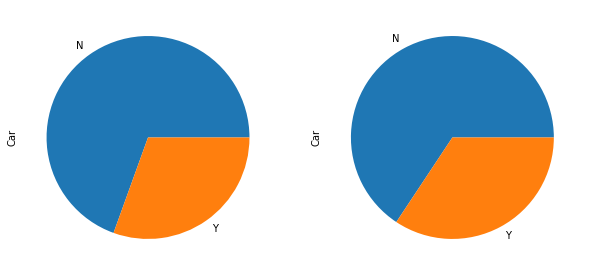

In [176]:
#Comparing Car for both
plt.subplot(121)
default_cust["Car"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Car"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

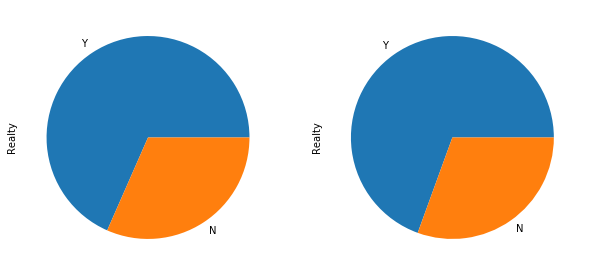

In [177]:
#Comparing Realty
plt.subplot(121)
default_cust["Realty"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Realty"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

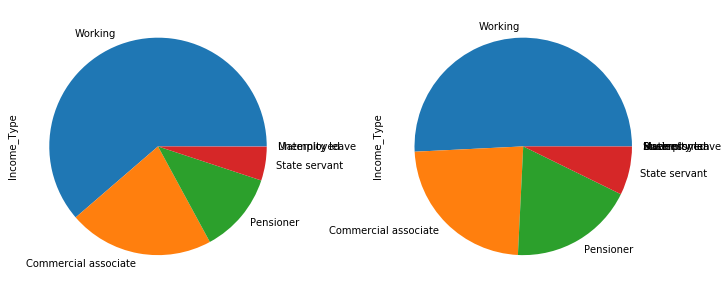

In [178]:
#Comparing Income Type
plt.subplot(121)
default_cust["Income_Type"].value_counts().plot.pie(figsize=(12,5))
plt.subplot(122)
other_cust["Income_Type"].value_counts().plot.pie(figsize=(12,5))

In [ ]:
#Defaulters have more proportion of working professionals

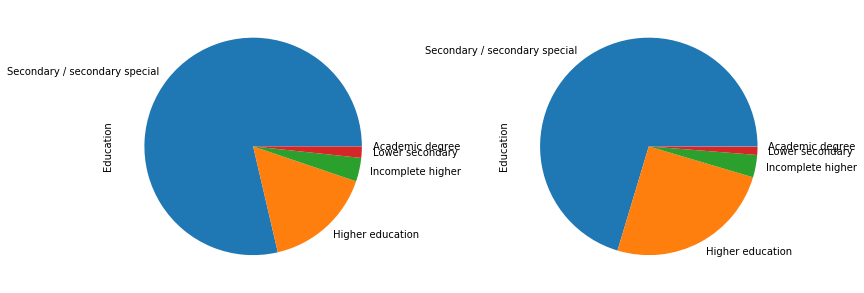

In [179]:
#Comparing Education
plt.subplot(121)
default_cust["Education"].value_counts().plot.pie(figsize=(13,5))
plt.subplot(122)
other_cust["Education"].value_counts().plot.pie(figsize=(13,5))

In [ ]:
#Defaulters have more proprtion from Secondary/Senior Secondary Education

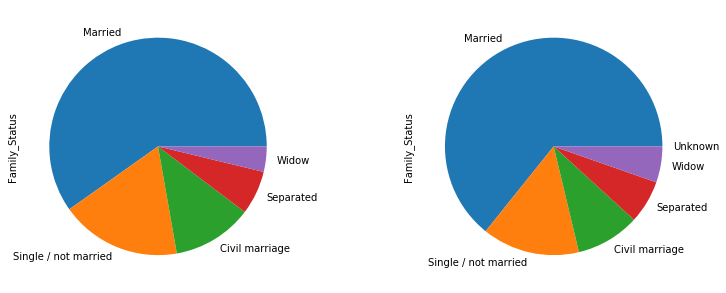

In [180]:
#Comparing Family Staus
plt.subplot(121)
default_cust["Family_Status"].value_counts().plot.pie(figsize=(13,5))
plt.subplot(122)
other_cust["Family_Status"].value_counts().plot.pie(figsize=(13,5))

In [ ]:
#Not much difference

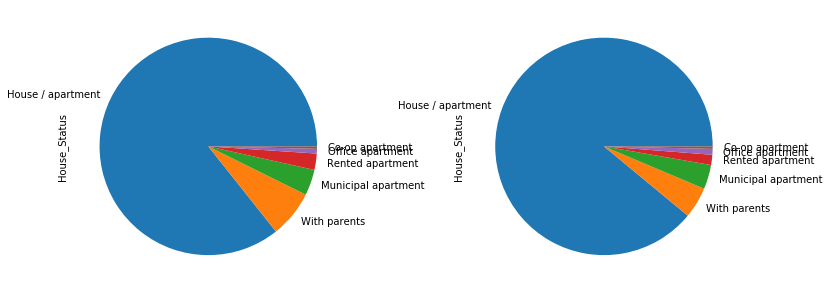

In [181]:
#Comparing House Status
plt.subplot(121)
default_cust["House_Status"].value_counts().plot.pie(figsize=(13,5))
plt.subplot(122)
other_cust["House_Status"].value_counts().plot.pie(figsize=(13,5))

In [ ]:
#Not much difference

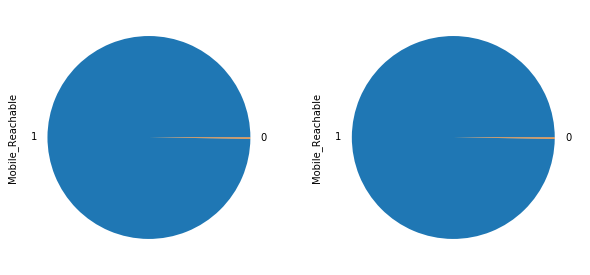

In [182]:
#Comparing Mobile Reachable
plt.subplot(121)
default_cust["Mobile_Reachable"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Mobile_Reachable"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

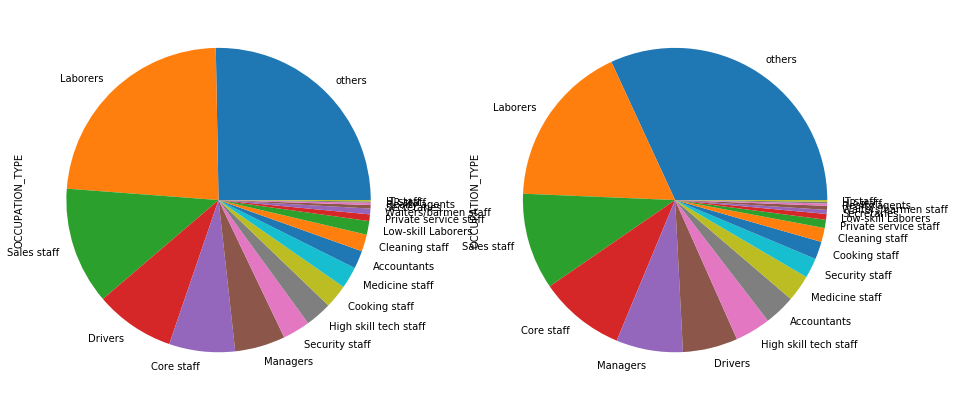

In [183]:
#Comparing Occupation Type
plt.subplot(121)
default_cust["OCCUPATION_TYPE"].value_counts().plot.pie(figsize=(15,15))
plt.subplot(122)
other_cust["OCCUPATION_TYPE"].value_counts().plot.pie(figsize=(15,15))

In [ ]:
#Not much difference

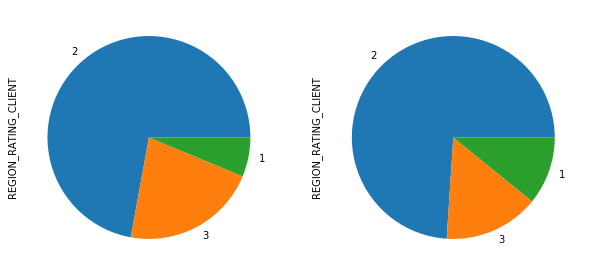

In [184]:
#Comparing Region Rating
plt.subplot(121)
default_cust["REGION_RATING_CLIENT"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["REGION_RATING_CLIENT"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

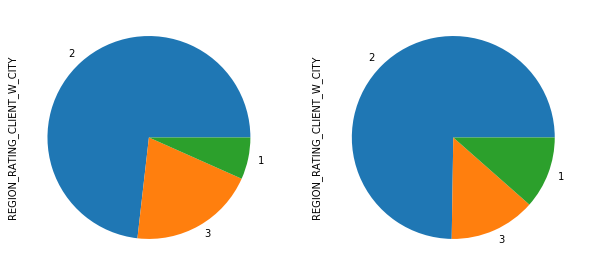

In [185]:
#Comparing Region Rating City
plt.subplot(121)
default_cust["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

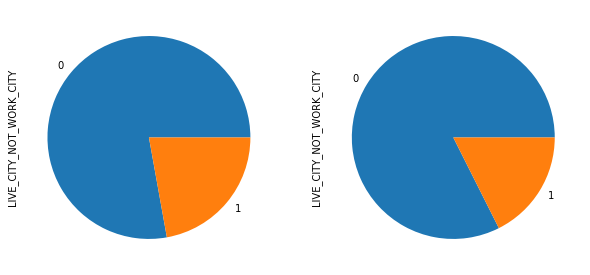

In [186]:
#Comparing Living City not Working City
plt.subplot(121)
default_cust["LIVE_CITY_NOT_WORK_CITY"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["LIVE_CITY_NOT_WORK_CITY"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

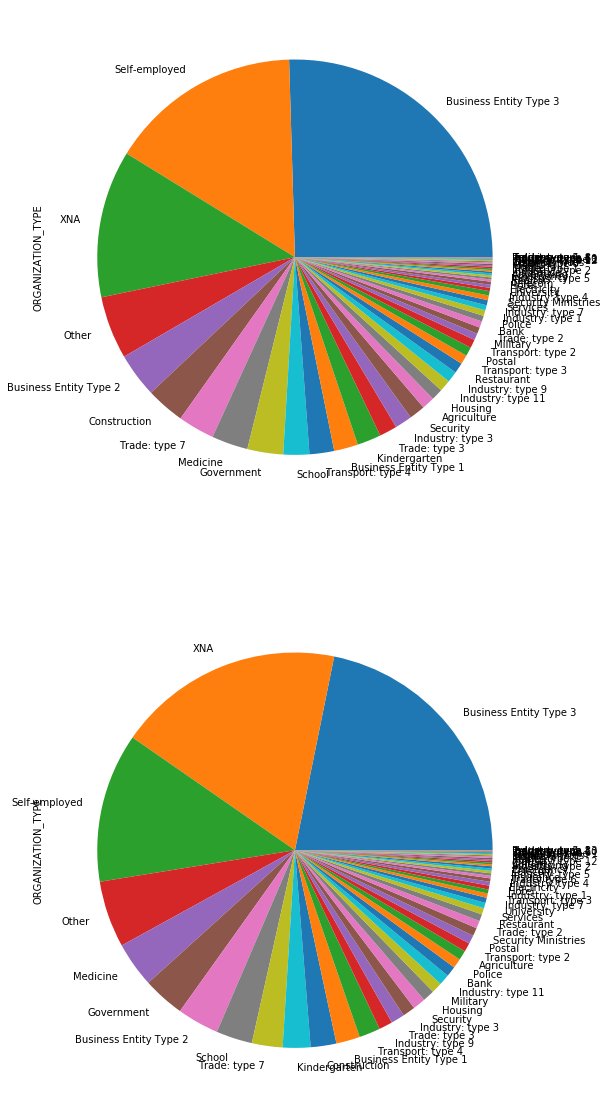

In [187]:
#Comparing Organization Type
plt.subplot(211)
default_cust["ORGANIZATION_TYPE"].value_counts().plot.pie(figsize=(20,20))
plt.subplot(212)
other_cust["ORGANIZATION_TYPE"].value_counts().plot.pie(figsize=(20,20))

In [ ]:
#Not much difference

C:\Users\vi024ch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


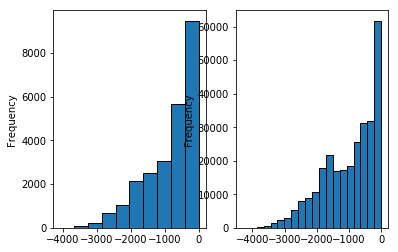

In [188]:
#Comparing Days last phone change
other_cust["DAYS_LAST_PHONE_CHANGE"] =other_cust["DAYS_LAST_PHONE_CHANGE"].astype(float)
plt.subplot(121)
default_cust["DAYS_LAST_PHONE_CHANGE"].plot.hist(bins=10, ec='black')
plt.subplot(122)
other_cust["DAYS_LAST_PHONE_CHANGE"].plot.hist(bins=20, ec='black')

In [ ]:
#Not much difference

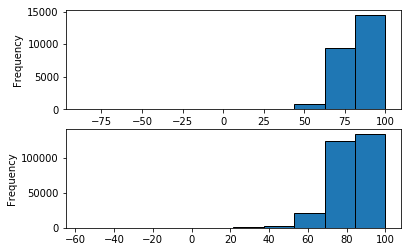

In [189]:
#Comparing Income percent
plt.subplot(211)
default_cust["Income_perc"].plot.hist(bins=10, ec='black')
plt.subplot(212)
other_cust["Income_perc"].plot.hist(bins=10, ec='black')

In [ ]:
#Defaulters have less income percent as savings

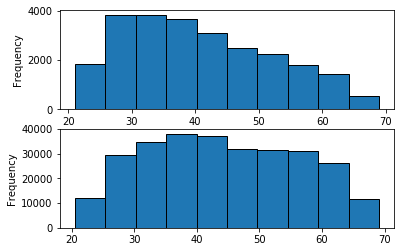

In [190]:
#Comparing Age
plt.subplot(211)
default_cust["Age"].plot.hist(bins=10, ec='black')
plt.subplot(212)
other_cust["Age"].plot.hist(bins=10, ec='black')

In [ ]:
#Defaulters fall mostly in the age-group 25-50

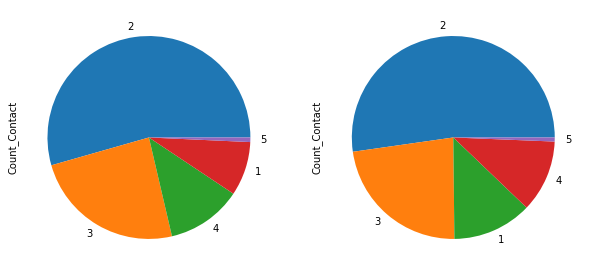

In [191]:
#Comparing Count of Contacts
plt.subplot(121)
default_cust["Count_Contact"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Count_Contact"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

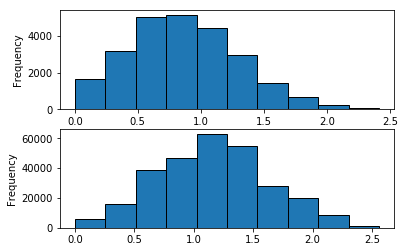

In [192]:
#Comparing Score_Ext
plt.subplot(211)
default_cust["Score_Ext"].plot.hist(bins=10, ec='black')
plt.subplot(212)
other_cust["Score_Ext"].plot.hist(bins=10, ec='black')

In [ ]:
#Not much difference

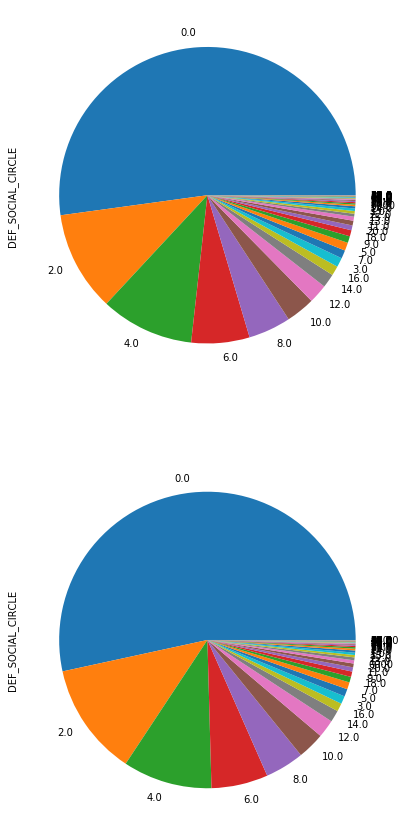

In [193]:
#Comparing Defaulters Social Circle
plt.subplot(211)
default_cust["DEF_SOCIAL_CIRCLE"].value_counts().plot.pie(figsize=(20,15))
plt.subplot(212)
other_cust["DEF_SOCIAL_CIRCLE"].value_counts().plot.pie(figsize=(20,15))

In [ ]:
#Not much difference

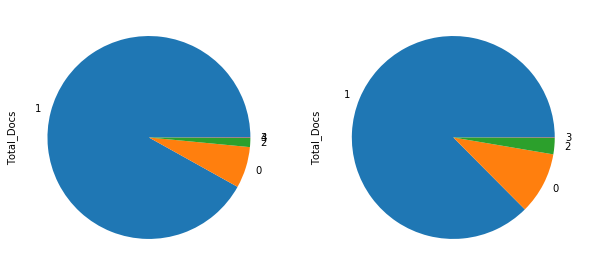

In [194]:
#Comparing Total Docs
plt.subplot(121)
default_cust["Total_Docs"].value_counts().plot.pie(figsize=(10,5))
plt.subplot(122)
other_cust["Total_Docs"].value_counts().plot.pie(figsize=(10,5))

In [ ]:
#Not much difference

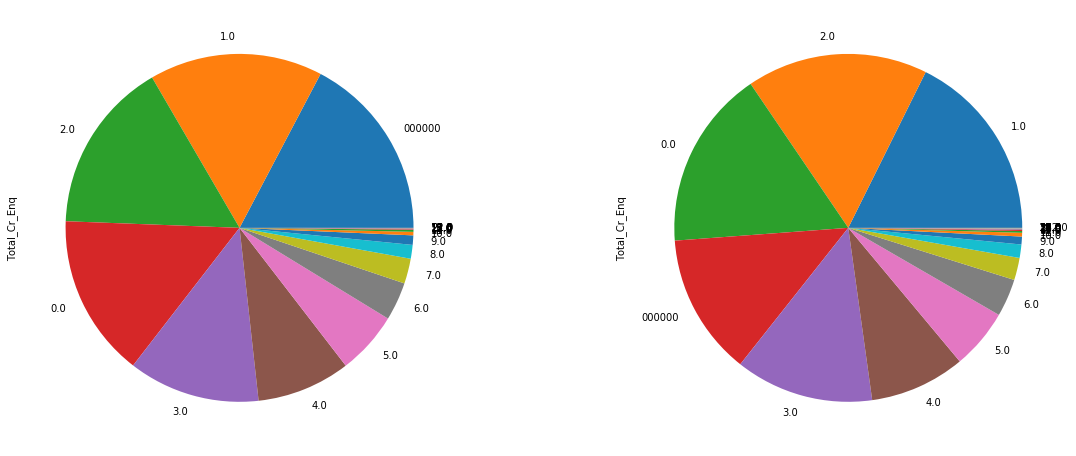

In [195]:
#Comparing Total Credit Enquiries
plt.subplot(121)
default_cust["Total_Cr_Enq"].value_counts().plot.pie(figsize=(20,8))
plt.subplot(122)
other_cust["Total_Cr_Enq"].value_counts().plot.pie(figsize=(20,8))

In [ ]:
#Not much difference

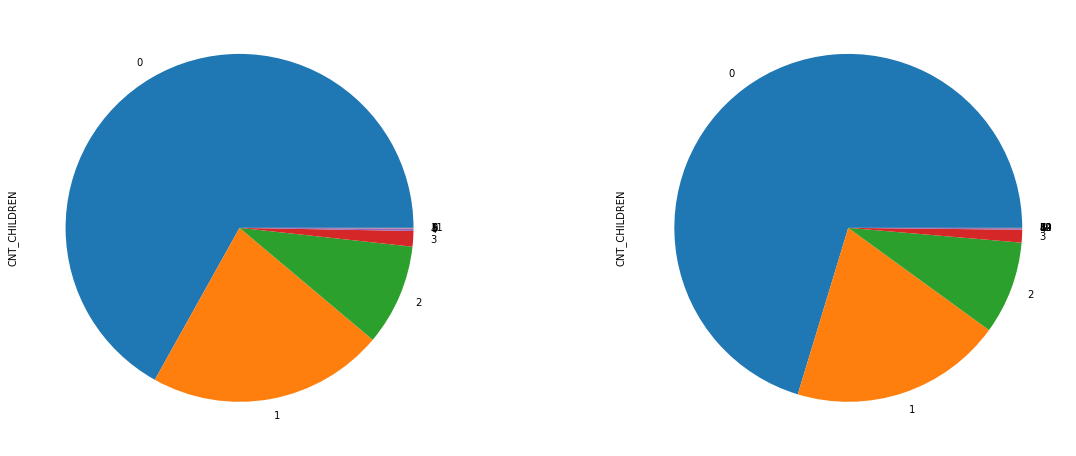

In [196]:
#Comparing Count of Children
plt.subplot(121)
default_cust["CNT_CHILDREN"].value_counts().plot.pie(figsize=(20,8))
plt.subplot(122)
other_cust["CNT_CHILDREN"].value_counts().plot.pie(figsize=(20,8))

In [ ]:
#Not much difference

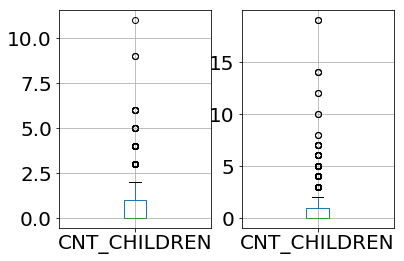

In [197]:
#Outliers
plt.subplot(121)
default_cust.boxplot(column=['CNT_CHILDREN'],fontsize=20,grid=True)
plt.subplot(122)
other_cust.boxplot(column=['CNT_CHILDREN'],fontsize=20,grid=True)

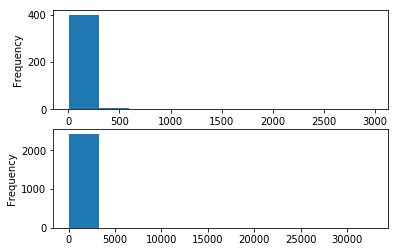

In [199]:
#Comparing TotalIncome
plt.subplot(211)
default_cust["AMT_INCOME_TOTAL"].value_counts().plot.hist()
plt.subplot(212)
other_cust["AMT_INCOME_TOTAL"].value_counts().plot.hist()

In [ ]:
#Not much difference

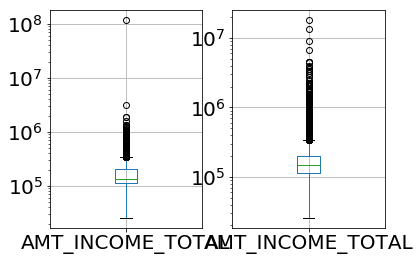

In [200]:
#Outliers
plt.subplot(121)
default_cust.boxplot(column=['AMT_INCOME_TOTAL'],fontsize=20,grid=True,figsize=(10,5))
plt.yscale('log')
plt.subplot(122)
other_cust.boxplot(column=['AMT_INCOME_TOTAL'],fontsize=20,grid=True,figsize=(10,5))
plt.yscale('log')

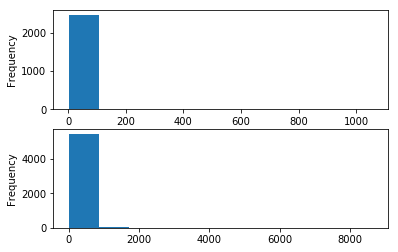

In [201]:
#Comparing Amount of Credit
plt.subplot(211)
default_cust["AMT_CREDIT"].value_counts().plot.hist()
plt.subplot(212)
other_cust["AMT_CREDIT"].value_counts().plot.hist()

In [ ]:
#Not much difference

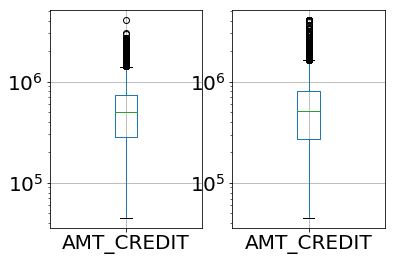

In [202]:
#Outliers
plt.subplot(121)
default_cust.boxplot(column=['AMT_CREDIT'],fontsize=20,grid=True,figsize=(10,5))
plt.yscale('log')
plt.subplot(122)
other_cust.boxplot(column=['AMT_CREDIT'],fontsize=20,grid=True,figsize=(10,5))
plt.yscale('log')

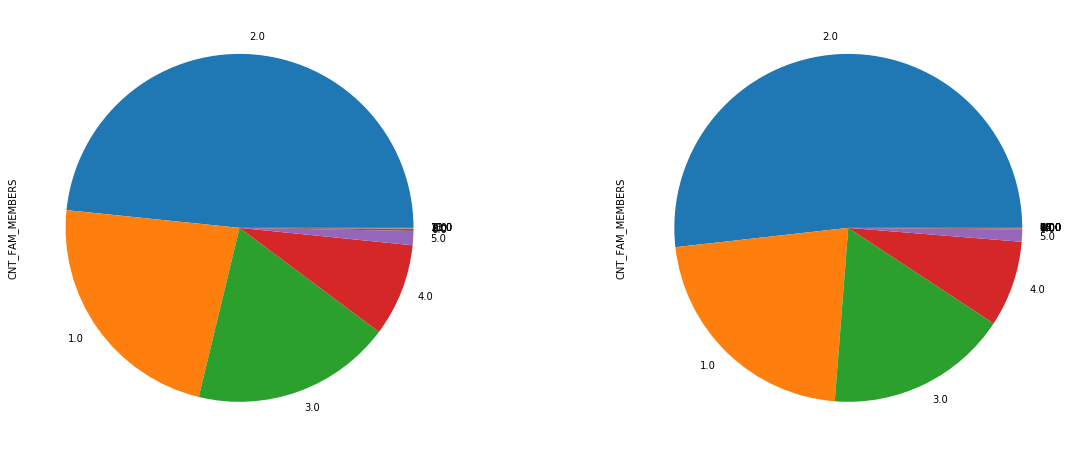

In [203]:
#Comparing Count of family members
plt.subplot(121)
default_cust["CNT_FAM_MEMBERS"].value_counts().plot.pie(figsize=(20,8))
plt.subplot(122)
other_cust["CNT_FAM_MEMBERS"].value_counts().plot.pie(figsize=(20,8))

In [ ]:
#No significant difference

In [204]:
#Correlation Columns- Identified on importance
corr_cols = ['Loan_Type', 'Gender', 'Car','Realty','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'Income_Type', 'Education', 'OCCUPATION_TYPE', 
             'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'Age','ORGANIZATION_TYPE', 'Total_Cr_Enq', 'Score_Ext']
       

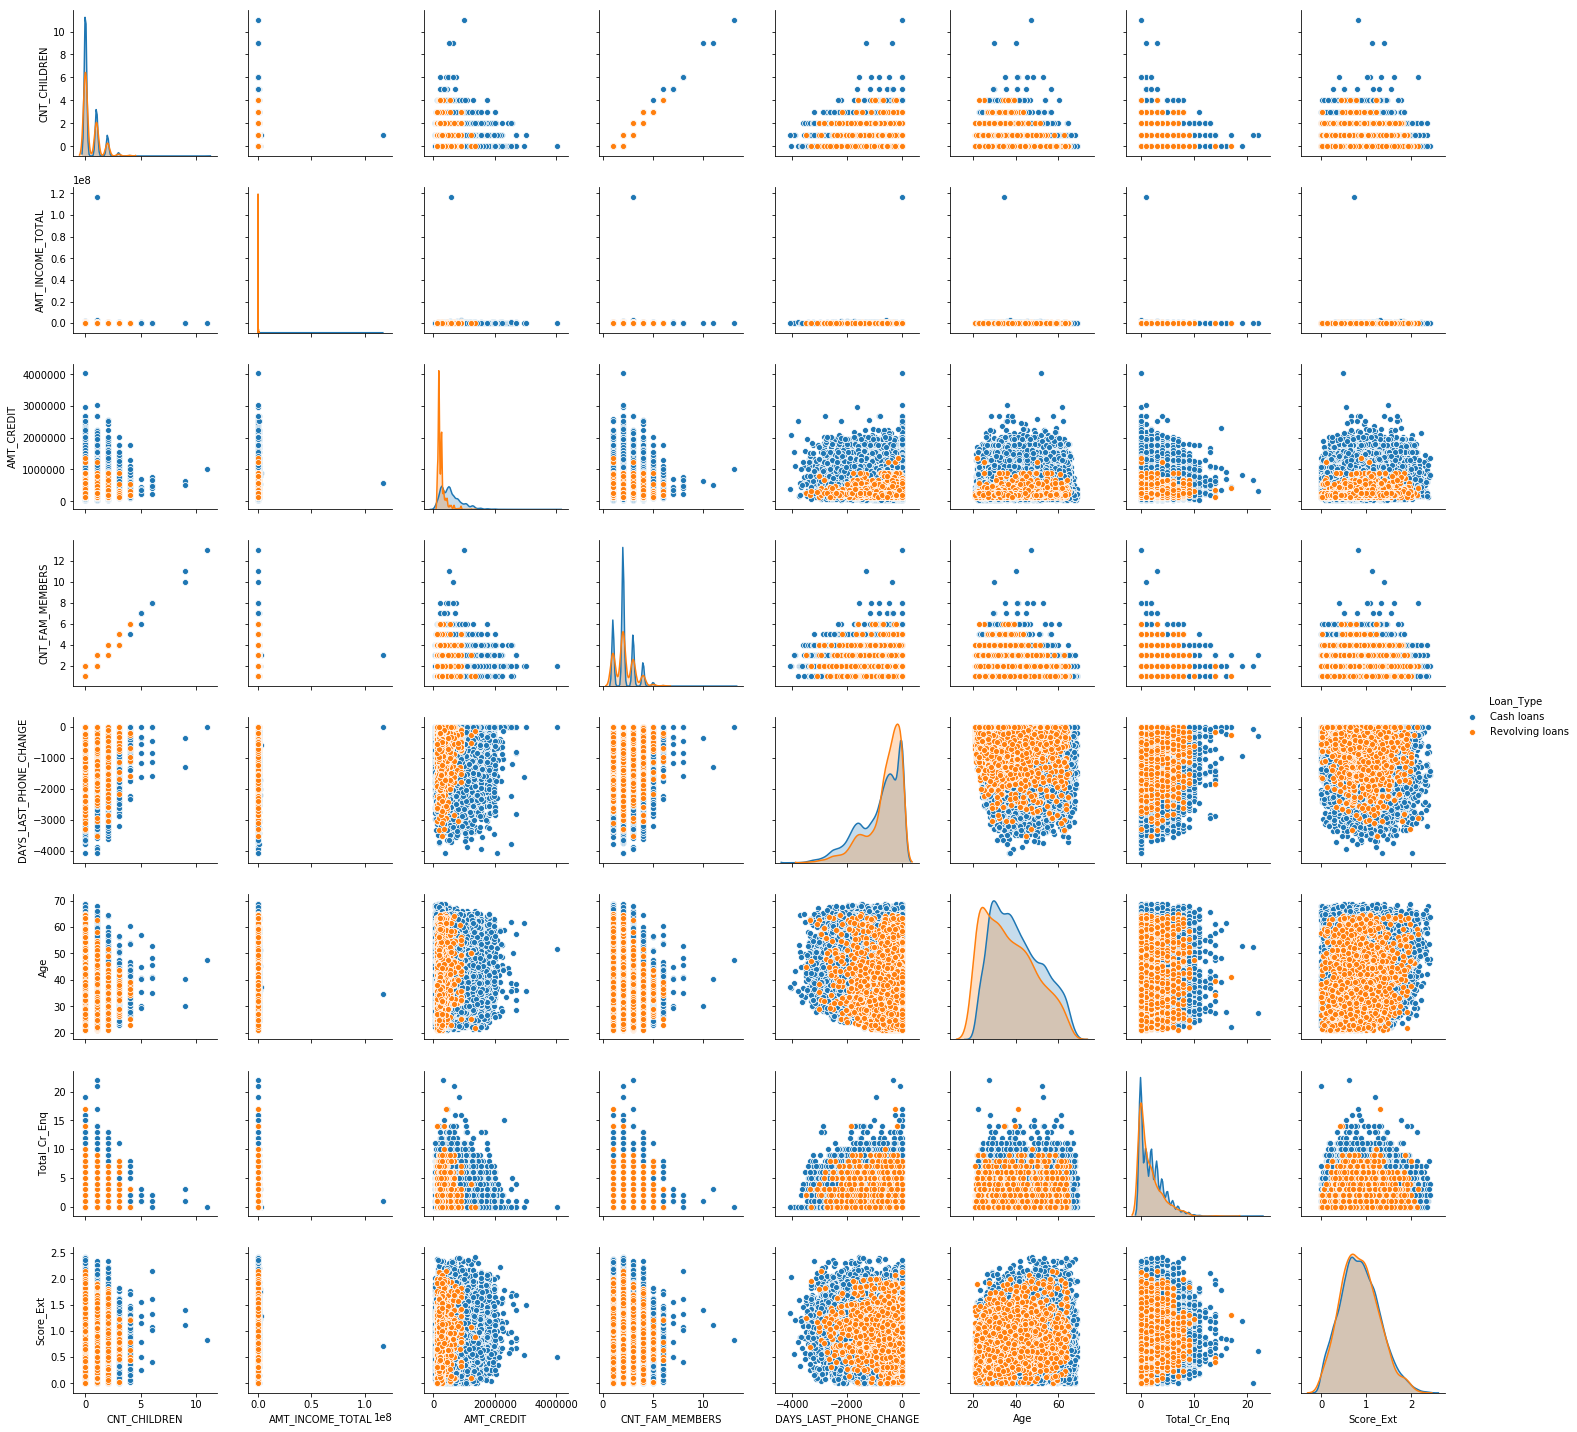

In [205]:
#Correlation plots on Defaulters
sns.pairplot(default_cust[corr_cols], hue = 'Loan_Type')

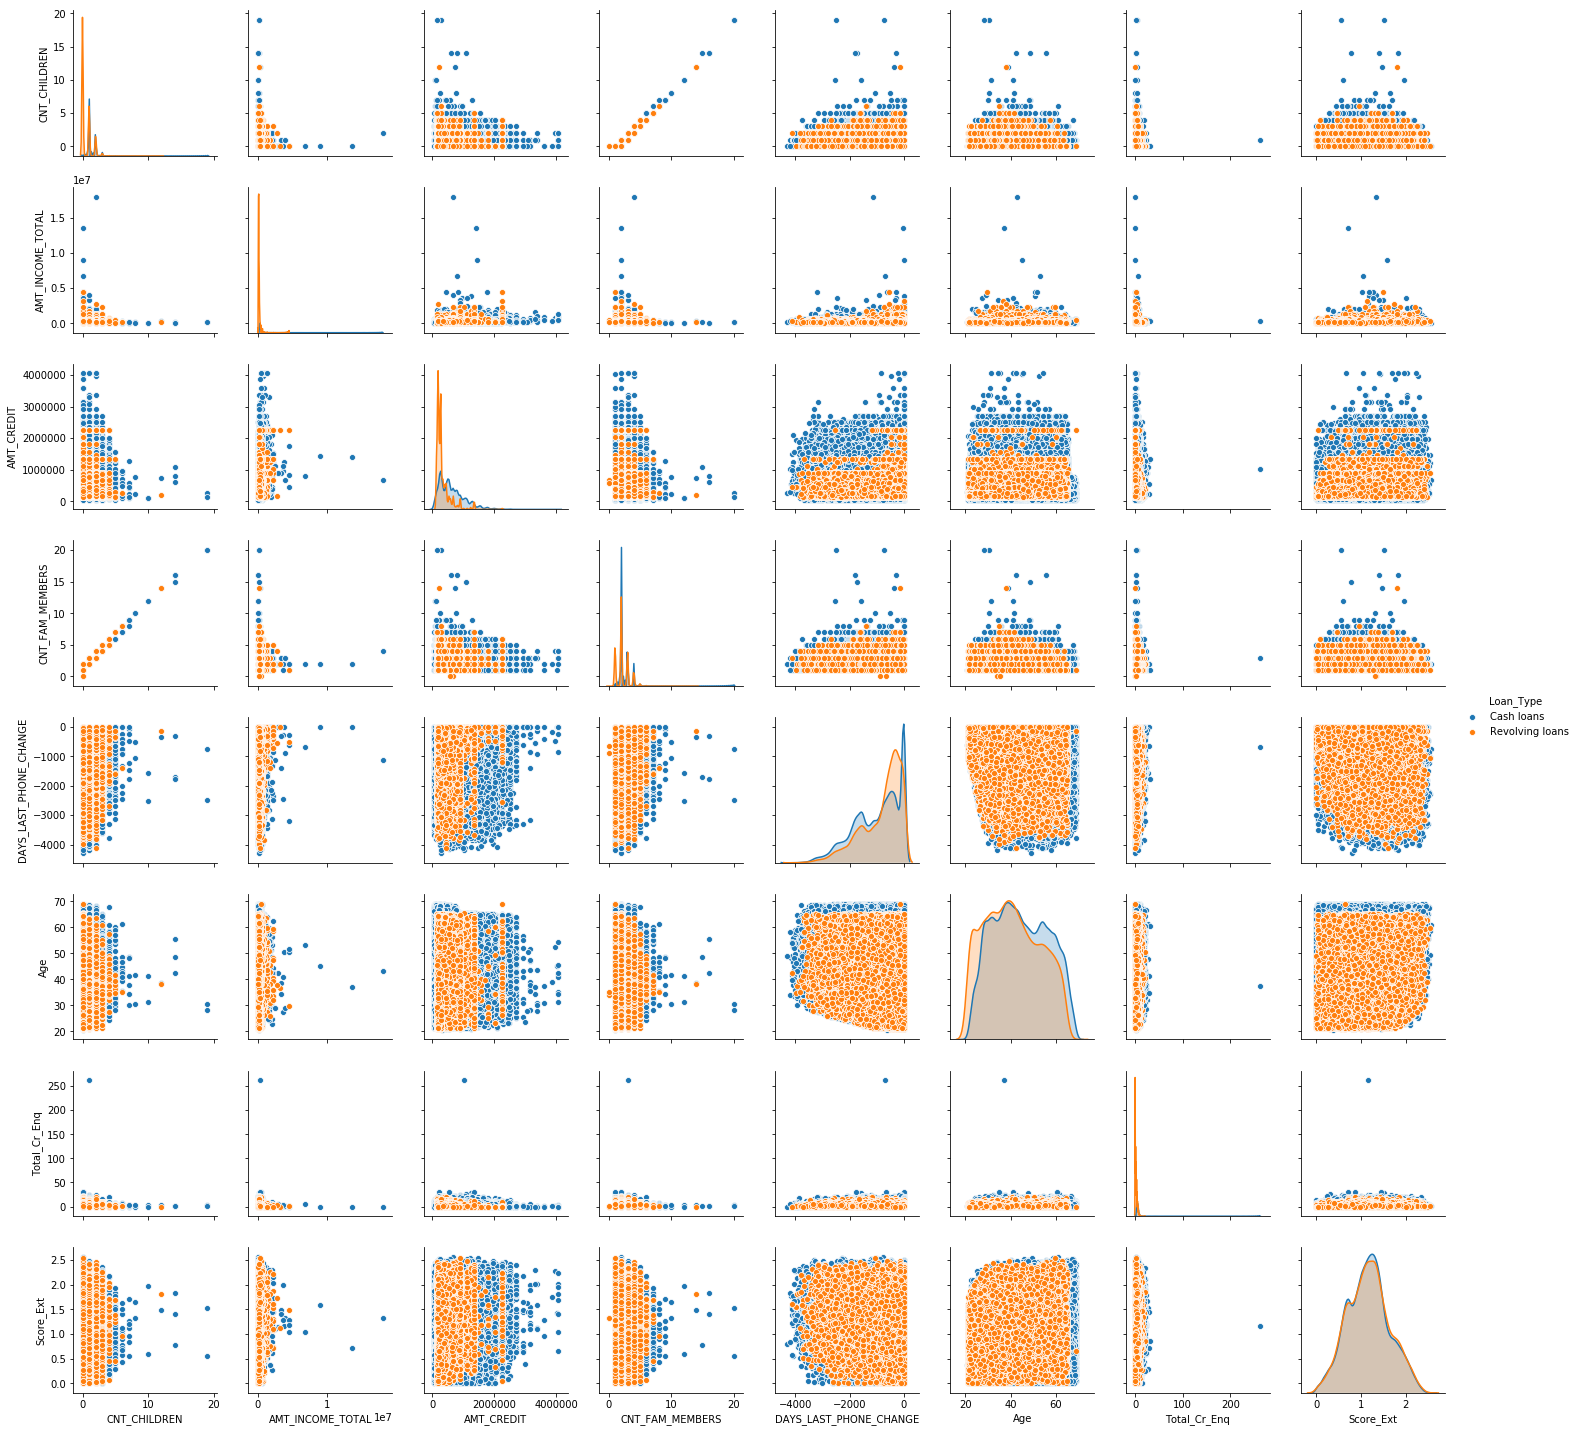

In [206]:
#Correlation plot on others
sns.pairplot(other_cust[corr_cols], hue = 'Loan_Type')

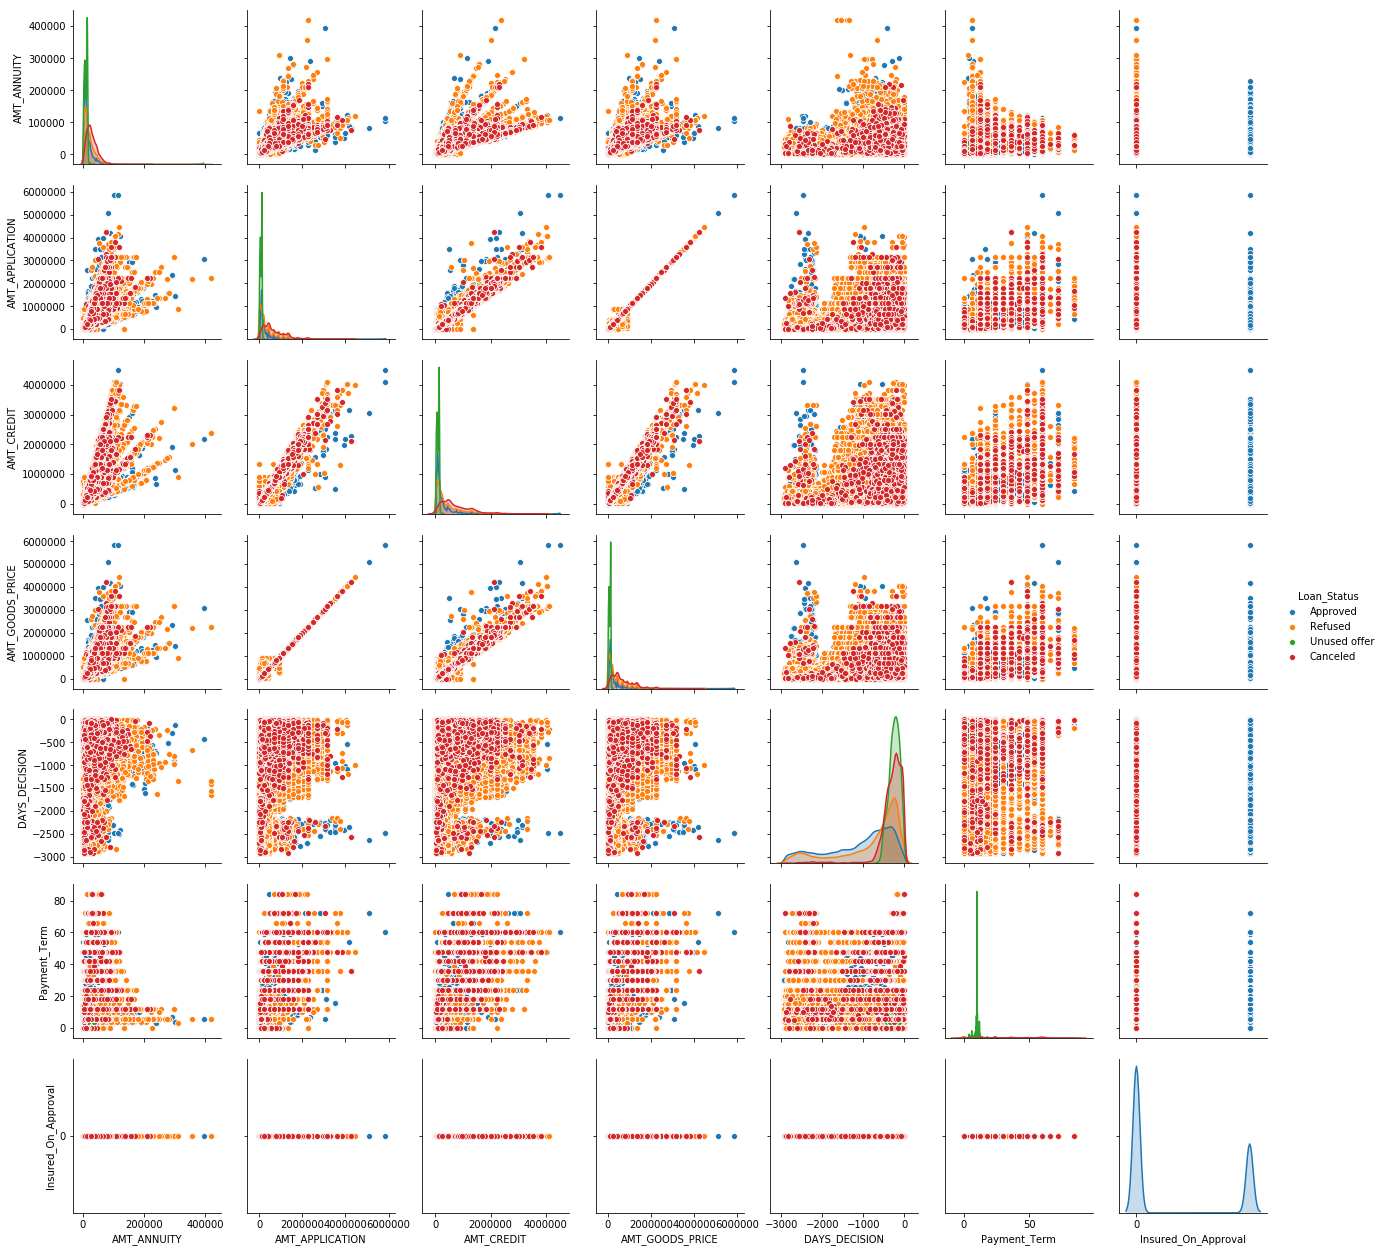

In [68]:
#Correlation Columns- Identified on importance
corr_cols_prev=['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'Loan_Status',
       'DAYS_DECISION', 'Payment_Term', 'Yield_group', 'Insured_On_Approval']

#Correlation plots for Previous Application Data
sns.pairplot(Prev_App[corr_cols_prev], hue = 'Loan_Status')